Forwared Euler Method. Accuracy is $\mathcal{O}(h)$.



In [18]:
import numpy as np
#Euler's method code
#Formula for the approximation: x_n+1 = x_n + f(t_n,x_n)*h
#define initial x value and declare list to hold future x values
x0 = 1;
x_vals = [];
x_vals.append(x0);
#define the derivative function
f_prime = lambda x:-.5*x
#define exact solution
exact_sol = lambda t: np.exp(-.5*t)
#the independent variable is time
# we want to approximate the ODE between t_start = start and t_final = stop.
# make the time vec using np.linspace(start, stop, num_points)
# example, t_vals = np.linspace(0,1,5) makes the vector = [0,.25..5,.75,1]
t_start = 0;
check_time = 1;
t_final = 50;
h_choice = 10;
num_points = (t_final-t_start)/h_choice + 1
t_vals = np.linspace(t_start,t_final,int(num_points))
#print(t_vals)
# once we make the time vector we can calculate the step size h
h = t_vals[1]-t_vals[0]
# h = (t_final-t_start)/(num_points -1)
# print("h = {}".format(h))
# print(len(t_vals))
# next we want to loop through all the time points and
# calculate the approximation x_n at each time point t_n
# we use a range object to loop through all the time points
# this way the variable i represents the index of the current time point
# and we can pull out the x value at the same index.
# example, range(0,5) makes the vec [0,1,2,3,4]

# python indexing starts at 0.
# if we define t_vals = np.linspace(start,end,num_points)
# then t_vals will have numpoints things in it
# but the indices will go from 0-num_points-1
# however, we already added x0 to the 0th index of x_vals
# so we will start our for loop at index 1
x_curr = x0;
for i in range(1,len(t_vals)):
  #print("the current iteration is {}".format(i))
  #print("the current time_val is {}".format(t_vals[i]))
  #print("the current value of x is {}".format(x_curr))
  x_next = x_curr+ h*f_prime(x_curr);
  #print('the next value of x is {}'.format(x_next))
  x_vals.append(x_next);
  e_n = exact_sol(t_vals[i])-x_next;
  if np.abs(t_vals[i] -check_time) < 1e-3:
    print("the iteration number is {}".format(i))
    print("the value of x_n is {}".format(x_next))
    print("the value of t_n is {}".format(t_vals[i]))
    print("the error, x({})-x_n = {}".format(check_time,e_n))
    print("e_n/h = {}".format(e_n/h))
  x_curr = x_next;

In this case, the ODE has an exact solution. We can plot the solution and the approximation together to see how changing $h$ changes the accuracy of the numerical solution.

6
6


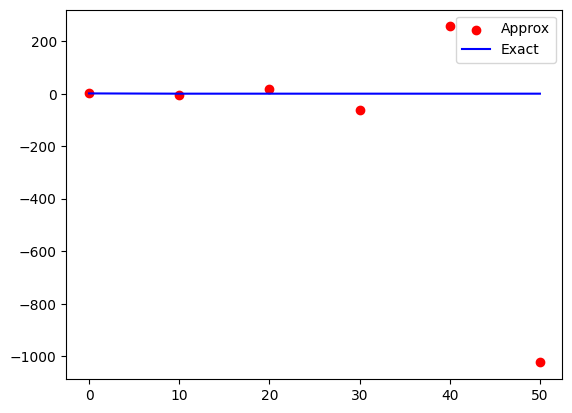

In [19]:
print(len(t_vals))
print(len(x_vals))
import matplotlib.pyplot as plt
plt.scatter(t_vals,x_vals,color = 'r',label = "Approx")
plt.plot(t_vals,exact_sol(t_vals),color = 'b',label = "Exact" )
plt.legend()
plt.show()

Use the code below to see how the error changes with respect to h.

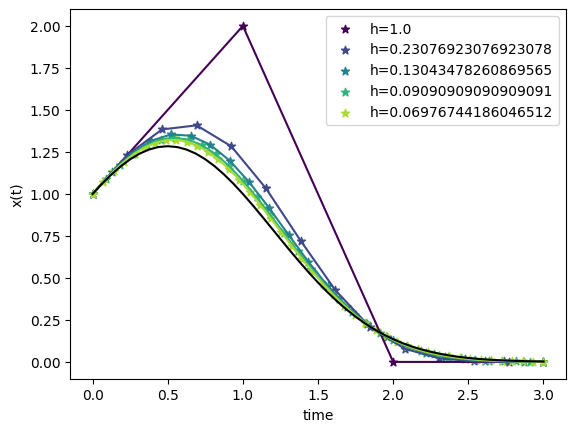

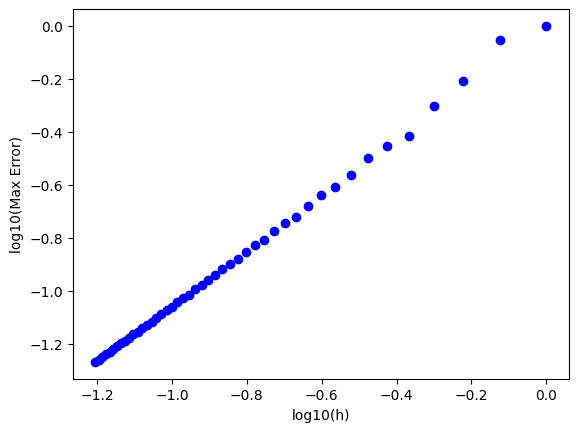

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
ax1 = plt.figure()
#Euler's method code
#Formula for the approximation: x_n+1 = x_n + f(t_n,x_n)*hs
#define the derivative function
f_prime = lambda t,x:(1-2*t)*x
#define exact solution
exact_sol = lambda t: np.exp(t-t**2)
#define start and end times
t_start = 0;
t_final = 3;
num_steps = np.arange(t_final+1,50,1)
# Define color_vec (you'll need to define how many colors are needed)
# Example using a colormap and then getting specific colors
cmap = plt.get_cmap('viridis')  # Or any other colormap you like
num_colors = len(num_steps)
color_vec = [cmap(i / num_colors) for i in range(num_colors)]
GE_vec = [];
h_vec = [];
for i in range(0,len(num_steps)):
    t_vals = np.linspace(t_start,t_final,num_steps[i]);
    h = t_vals[1]-t_vals[0];
    h_vec.append(h);
    x0 = 1;
    x_vals = [];
    x_vals.append(x0);
    x_curr = x0;
    for j in range(1,len(t_vals)):
      x_next = x_curr+ h*f_prime(t_vals[j-1],x_curr);
      x_vals.append(x_next);
      x_curr = x_next;
    if np.mod(i,10)==0:
      ax1 = plt.plot(t_vals,x_vals,color = color_vec[i])
      ax1 = plt.scatter(t_vals,x_vals,color = color_vec[i],marker = '*',label = "h={}".format(h))
      plt.legend()
    max_error = np.max(np.abs(exact_sol(t_vals)-x_vals));
    GE_vec.append(max_error)
ax1 = plt.plot(t_vals,exact_sol(t_vals),color = 'k',label = "Exact" )
ax1 = plt.xlabel("time")
ax1 = plt.ylabel("x(t)")
ax2 = plt.figure()
ax2 = plt.scatter(np.log10(h_vec),np.log10(GE_vec),color = 'b')
ax2 = plt.xlabel("log10(h)")
ax2 = plt.ylabel("log10(Max Error)")
plt.show()

In [ ]:
# Fit the slope of the best line
slope, intercept = np.polyfit(np.log10(h_vec), np.log10(GE_vec), 1)
print(intercept)

0.010832124184631184


Use additional terms in the Taylor Series, to develop an order 2 method:
$$x_{n+1} = x_{n} + h*f(t_n,x_n)+(h^2/2)*f'(t_n,x_n)$$


In [ ]:
import numpy as np
#High order method code
#Formula for the approximation: x_n+1 = x_n + h*f(t_n,x_n) + (h^2/2)f'(t_n,x_n)
#define initial x value and declare list to hold future x values
x0 = 1;
x_vals = [];
x_vals.append(x0);
#define the derivative function
h_func = lambda t,x:(1-2*t)*x
h_squared_func = lambda t,x:-2*x+x*(1-2*t)**2
#define exact solution
exact_sol = lambda t: np.exp(.25-(t-.5)**2)
#the independent variable is time
# we want to approximate the ODE between t_start = start and t_final = stop.
# make the time vec using np.linspace(start, stop, num_points)
# example, t_vals = np.linspace(0,1,5) makes the vector = [0,.25..5,.75,1]
t_start = 0;
check_time = 1.2;
t_final = 3;
h_choice = .15;
num_points = (t_final-t_start)/h_choice + 1
# print(num_points)
t_vals = np.linspace(t_start,t_final,int(num_points))
#print(t_vals)
# once we make the time vector we can calculate the step size h
h = t_vals[1]-t_vals[0]
# h = (t_final-t_start)/(num_points -1)
print("h = {}".format(h))
# print(len(t_vals))
# next we want to loop through all the time points and
# calculate the approximation x_n at each time point t_n
# we use a range object to loop through all the time points
# this way the variable i represents the index of the current time point
# and we can pull out the x value at the same index.
# example, range(0,5) makes the vec [0,1,2,3,4]

# python indexing starts at 0.
# if we define t_vals = np.linspace(start,end,num_points)
# then t_vals will have numpoints things in it
# but the indices will go from 0-num_points-1
# however, we already added x0 to the 0th index of x_vals
# so we will start our for loop at index 1
x_curr = x0;
for i in range(1,len(t_vals)):
  #print("the current iteration is {}".format(i))
  #print("the current time_val is {}".format(t_vals[i]))
  #print("the current value of x is {}".format(x_curr))
  ########!!!!EDIT HERE!!!!########
  x_next = x_curr + h*h_func(t_vals[i-1],x_curr) + (h**2/2)*h_squared_func(t_vals[i-1],x_curr)
  ##################################
  x_vals.append(x_next);
  e_n = exact_sol(t_vals[i])-x_next;
  if np.abs(t_vals[i] -check_time) < 1e-3:
    print("the iteration number is {}".format(i))
    print("the value of x_n is {}".format(x_next))
    print("the value of t_n is {}".format(t_vals[i]))
    print("the error, x({})-x_n = {}".format(check_time,e_n))
    print("e_n/h = {}".format(e_n/h))
  x_curr = x_next;

h = 0.15
the iteration number is 8
the value of x_n is 0.7835587098966555
the value of t_n is 1.2
the error, x(1.2)-x_n = 0.0030691511698979212
e_n/h = 0.020461007799319475


21
21


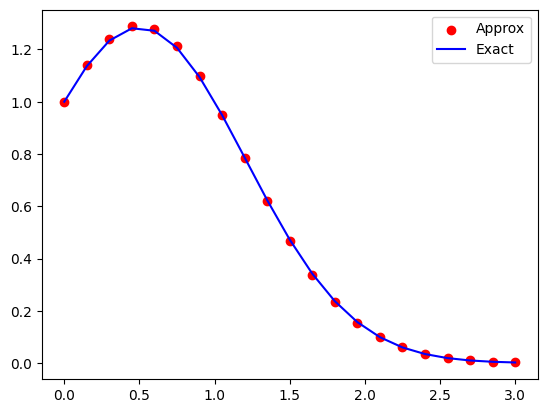

In [ ]:
print(len(t_vals))
print(len(x_vals))
import matplotlib.pyplot as plt
plt.scatter(t_vals,x_vals,color = 'r',label = "Approx")
plt.plot(t_vals,exact_sol(t_vals),color = 'b',label = "Exact" )
plt.legend()
plt.show()

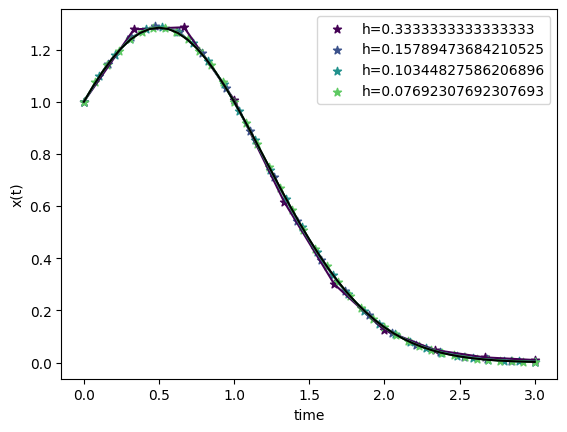

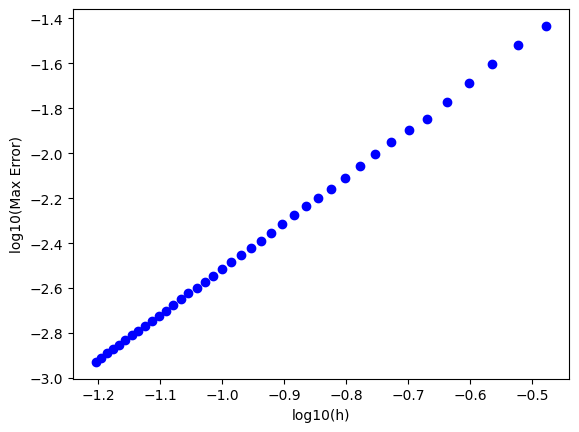

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
ax1 = plt.figure()
#High order method code
#Formula for the approximation: ########WRITE IT HERE!!!!!!!!########
#define the derivative function
h_func = lambda t,x:(1-2*t)*x
h_squared_func = lambda t,x:-2*x+x*(1-2*t)**2
#define exact solution
exact_sol = lambda t: np.exp(.25-(t-.5)**2)
#define start and end times
t_start = 0;
t_final = 3;
num_steps = np.arange(10,50,1)
# Define color_vec (you'll need to define how many colors are needed)
# Example using a colormap and then getting specific colors
cmap = plt.get_cmap('viridis')  # Or any other colormap you like
num_colors = len(num_steps)
color_vec = [cmap(i / num_colors) for i in range(num_colors)]
GE_vec = [];
h_vec = [];
for i in range(0,len(num_steps)):
    t_vals = np.linspace(t_start,t_final,num_steps[i]);
    h = t_vals[1]-t_vals[0];
    h_vec.append(h);
    #define initial x value and declare list to hold future x values
    x0 = 1;
    x_vals = [];
    x_vals.append(x0);
    x_curr = x0;
    for j in range(1,len(t_vals)):
      ########EDIT HERE!!!!!!!!########
      x_next = x_curr + h*h_func(t_vals[j-1],x_curr) + (h**2/2)*h_squared_func(t_vals[j-1],x_curr)
      #################################
      x_vals.append(x_next);
      x_curr = x_next;
    if np.mod(i,10)==0:
      ax1 = plt.plot(t_vals,x_vals,color = color_vec[i])
      ax1 = plt.scatter(t_vals,x_vals,color = color_vec[i],marker = '*',label = "h={}".format(h))
      plt.legend()
    max_error = np.max(np.abs(exact_sol(t_vals)-x_vals));
    GE_vec.append(max_error)
ax1 = plt.plot(t_vals,exact_sol(t_vals),color = 'k',label = "Exact" )
ax1 = plt.xlabel("time")
ax1 = plt.ylabel("x(t)")
ax2 = plt.figure()
ax2 = plt.scatter(np.log10(h_vec),np.log10(GE_vec),color = 'b')
ax2 = plt.xlabel("log10(h)")
ax2 = plt.ylabel("log10(Max Error)")
plt.show()

In [ ]:
# Fit the slope of the best line
slope, intercept = np.polyfit(np.log10(h_vec), np.log10(GE_vec), 1)
print(slope)

2.0556721365895374


Convergence is only the bare minimum required for a method to work. This does not, however, guarantee that the method works well, just that it works when $h$ is small enough. To motivate the discussion, consider the ODE
$$x'(t) = -20(x(t)-\sin(t))+\cos(t), x(0) = 1$$
for $t \in [0,3]$.

The exact solution is
$$x(t) = e^{-20t}+\sin(t).$$

Write code to plot the solution below on the interval $[0,3]$.

(-2.0, 2.0)

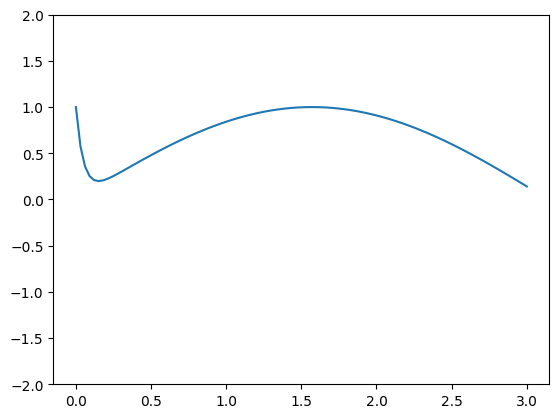

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
time_vec = np.linspace(0,3,100)
exact_sol = lambda t: np.exp(-20*t)+np.sin(t)
plt.plot(time_vec,exact_sol(time_vec))
plt.ylim([-2,2])

Use the code cell below to approximate solutions to the IVP using forward Euler.

Do it for $h = .15,.11,.1,.09$ and compare the result.

In [ ]:
import numpy as np
#Euler's method code
#Formula for the approximation: x_n+1 = x_n + f(t_n,x_n)*h
#define the derivative function
f_prime = lambda t,x:-20*(x-np.sin(t)) + np.cos(t)
#define exact solution
exact_sol = lambda t: np.exp(-20*t)+np.sin(t)
t_start = 0;
t_final = 3;
#define initial x value and declare list to hold future x values
x0 = exact_sol(t_start);
x_vals = [];
x_vals.append(x0);
######### EDIT HERE ##########
h_choice = .15;#.15,.11,.1,.09
######### EDIT HERE ##########
num_points = (t_final-t_start)/h_choice + 1
t_vals = np.linspace(t_start,t_final,int(num_points))
#define h
h = t_vals[1]-t_vals[0]
#start approximating
x_curr = x0;
for i in range(1,len(t_vals)):
  #print("the current iteration is {}".format(i))
  #print("the current time_val is {}".format(t_vals[i]))
  #print("the current value of x is {}".format(x_curr))
  x_next = x_curr+ h*f_prime(t_vals[i-1],x_curr);
  #print('the next value of x is {}'.format(x_next))
  x_vals.append(x_next);
  x_curr = x_next;

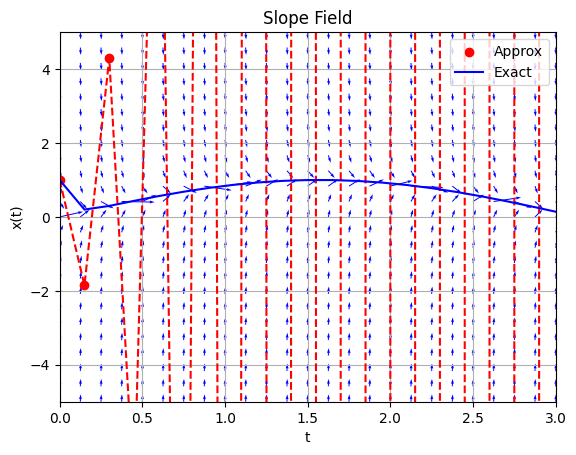

In [ ]:
# prompt: can you write code that plots the slope field of an ODE

import numpy as np
import matplotlib.pyplot as plt

def plot_slope_field(f, x_range, y_range, num_points=25):
    """Plots the slope field for an ODE.

    Args:
        f: The function defining the ODE, dy/dx = f(x, y).
        x_range: Tuple (xmin, xmax) defining the x-axis range.
        y_range: Tuple (ymin, ymax) defining the y-axis range.
        num_points: Number of grid points in each direction.
    """

    x = np.linspace(x_range[0], x_range[1], num_points)
    y = np.linspace(y_range[0], y_range[1], num_points)
    X, Y = np.meshgrid(x, y)

    # Calculate slopes at each grid point
    slopes = f(X, Y)

    # Normalize slopes for better visualization
    norm = np.sqrt(1 + slopes**2)
    dx = 1 / norm
    dy = slopes / norm


    plt.quiver(X, Y, dx, dy, color='blue', angles='xy', scale_units='xy', scale=5, width=0.002)
    plt.xlabel('t')
    plt.ylabel('x(t)')
    plt.title('Slope Field')
    plt.grid(True)

# Example usage: dy/dx = x + y
def example_ode(t,x):
    return -20*(x-np.sin(t))+np.cos(t)

# Define the x and y ranges
t_range = (0, 3)
x_range = (-5, 5)

plot_slope_field(example_ode, t_range, x_range)
plt.scatter(t_vals,x_vals,color = 'r',label = "Approx")
plt.plot(t_vals,x_vals,color = 'r',linestyle='--')
plt.plot(t_vals,exact_sol(t_vals),color = 'b',label = "Exact" )
plt.ylim([-5,5])
plt.xlim([0,3])
plt.legend()
plt.show()

In [ ]:
#write code here to solve the same system using backward Euler?

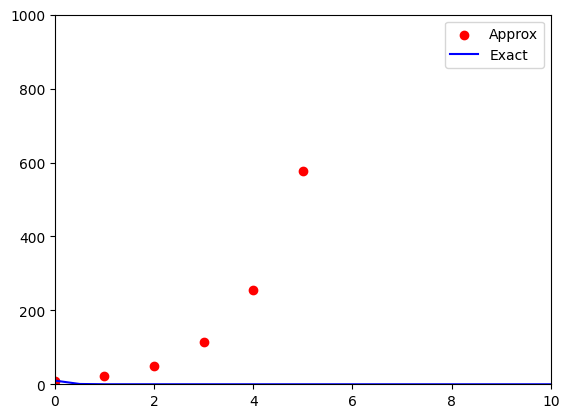

In [ ]:
# prompt: can you write code for forward Euler to solve x'(t) = -5*x

import numpy as np
import matplotlib.pyplot as plt

# Backward Euler Method
# Formula for the approximation: x_n+1 = x_n + h*f(t_n+1,x_n+1)

# Define initial x value and declare list to hold future x values
x0 = 10
x_vals = []
x_vals.append(x0)

# Define the derivative function
f_prime = lambda x: -5 * x

# Define exact solution
exact_sol = lambda t: 10*np.exp(-5 * t)
h_choice = .5
t_vals = []
t0 = 0;
t_vals = np.linspace(0,100,201)
x_curr = x0
for i in range(1, len(t_vals)):
  # We need to solve for x_n+1 using a root finding method
  # Here, we use a simple iterative method=

  x_next = x_curr + h * f_prime(x_curr)

  x_vals.append(x_next)

  x_curr = x_next


plt.scatter(t_vals, x_vals, color='r', label="Approx")
plt.plot(t_vals, exact_sol(t_vals), color='b', label="Exact")
plt.legend()
plt.xlim([0,10])
plt.ylim([0,1000])
plt.show()


In [ ]:
100/.5

200.0